# Libraries

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

# plot style
plt.style.use("seaborn-v0_8")
# print(plt.style.available)

# the "R4" palette
_colours = ["#000000f0", "#DF536Bf0", "#61D04Ff0", "#2297E6f0",
            "#28E2E5f0", "#CD0BBCf0", "#F5C710f0", "#999999f0"]

_linestyles = ["solid", "dashed", "dashdot", "dotted"]

# A different plotting style for each plotted line
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=_colours, linestyle=_linestyles*2)
plt.rcParams["patch.facecolor"] = _colours[0]

# Python version
import sys
print(f"sys: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"scipy: {scipy.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborns {sns.__version__}")

sys: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
numpy: 1.24.2
scipy: 1.10.1
pandas: 1.5.3
matplotlib: 3.7.1
seaborns 0.12.2


# Load data

In [2]:
heights = np.loadtxt("data/nhanes_adult_female_height_2020.txt")

In [3]:
print(len(heights))
print(heights[:6])

4221
[160.2 152.7 161.2 157.4 154.6 144.7]


# Numpy

In [4]:
print(np.array([0, 1, 2, 3])) # from list
print(np.array((0, 1, 2, 3))) # from turple
print(np.array(range(0, 4))) # from range

[0 1 2 3]
[0 1 2 3]
[0 1 2 3]


In [5]:
a1 = np.array([0, 1, 2, 3])
print(a1)
print(type(a1))
print(a1.dtype)

print('='*50)

a1 = a1.astype('float')
print(a1)
print(type(a1))
print(a1.dtype)


[0 1 2 3]
<class 'numpy.ndarray'>
int32
[0. 1. 2. 3.]
<class 'numpy.ndarray'>
float64


In [6]:
# arange is similar to the built-in range, but outputs a vector
print(np.arange(0, 10, 1))
print(np.arange(0, 10, 2))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]


In [7]:
# A sequence of equidistant points in a given interval
print(np.linspace(0, 1, 5))

[0.   0.25 0.5  0.75 1.  ]


In [8]:
print(np.repeat(5, 6))
print(np.repeat([1, 2], 3))
print(np.repeat([1, 2], [3, 5]))

[5 5 5 5 5 5]
[1 1 1 2 2 2]
[1 1 1 2 2 2 2 2]


In [9]:
print(np.tile([0, 1, 2], 3))

[0 1 2 0 1 2 0 1 2]


In [10]:
print(np.zeros(5))
print(np.ones(5))

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]


In [11]:
print(np.r_[1, 2, 3, np.nan, 5, np.inf])
print(np.r_[0:10:2])
print(np.r_[10:0:-2])
print(np.r_[0:10:4j]) # only in this context, it denotes the output length

[ 1.  2.  3. nan  5. inf]
[0 2 4 6 8]
[10  8  6  4  2]
[ 0.          3.33333333  6.66666667 10.        ]


In [12]:
print(np.r_[1, 2, [33]*2, 0:3, 10:13:3j])

[ 1.   2.  33.  33.   0.   1.   2.  10.  11.5 13. ]


In [13]:
print(np.random.choice(np.arange(0,5), 20))

[2 4 2 1 3 2 3 1 1 0 1 1 0 0 1 3 4 0 0 4]


(100000,)


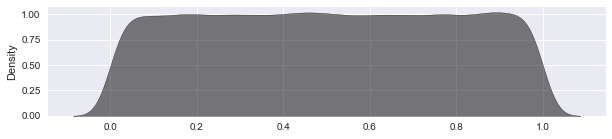

In [14]:
# uniform distribution
a1 = np.random.rand(10**5)
print(a1.shape)
plt.figure(figsize=[10, 2])
sns.kdeplot(a1, fill=True, alpha=.5)
plt.show()

(100000,)


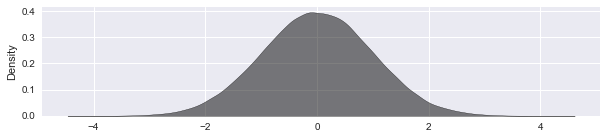

In [15]:
# standard normal distribution (mean=0 and variance=1)
a1 = np.random.randn(10**5)
print(a1.shape)
plt.figure(figsize=[10, 2])
sns.kdeplot(a1, fill=True, alpha=.5)
plt.show()

# Histogram

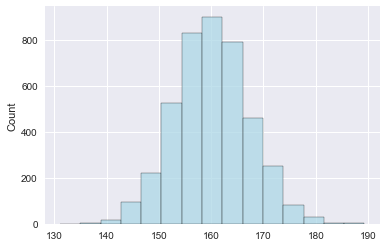

counts:
[  1   2  17  94 223 528 830 902 791 463 252  83  28   5   2]

bins:
[131.1  134.98 138.86 142.74 146.62 150.5  154.38 158.26 162.14 166.02
 169.9  173.78 177.66 181.54 185.42 189.3 ]


In [16]:
sns.histplot(heights, bins=15, color="lightblue", edgecolor="black")
plt.show()

counts, bins = np.histogram(heights, bins=15)
print(f"counts:\n{counts}")
print(f"\nbins:\n{bins}")

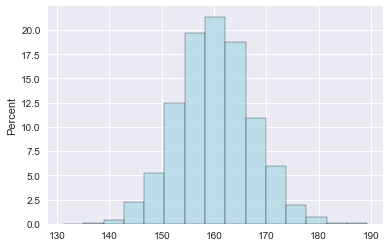

In [17]:
# stat="percent": normalise the bar heights so that they all sum to 1 (or 100%),
# which resulted in a probability histogram.
sns.histplot(heights, stat="percent", bins=15, color="lightblue")
plt.show()

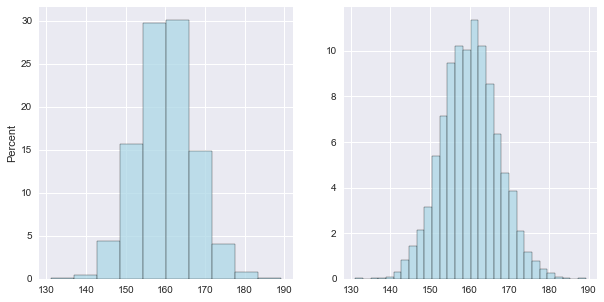

In [18]:
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1) # 1 row, 2 col, plot 1
sns.histplot(heights, stat="percent", bins=10, color="lightblue")
plt.subplot(1, 2, 2) # 1 row, 2 col, plot 2
sns.histplot(heights, stat="percent", bins=30, color="lightblue")
plt.ylabel(None)
plt.show()

max: 131.1
min: 189.3


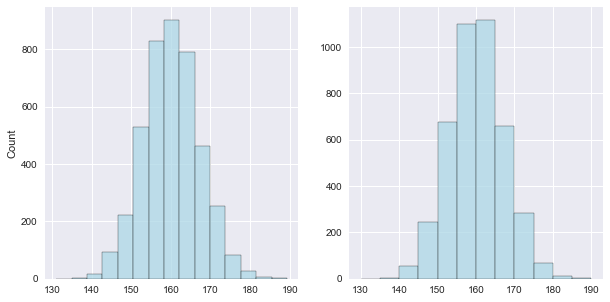

In [19]:
print(f"max: {heights.min()}")
print(f"min: {heights.max()}")

plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1) # 1 row, 2 col, plot 1
sns.histplot(heights, bins=15, color="lightblue")
plt.subplot(1, 2, 2) # 1 row, 2 col, plot 2
sns.histplot(heights, bins=np.arange(130, 195, 5), color="lightblue")
plt.ylabel(None)
plt.show()

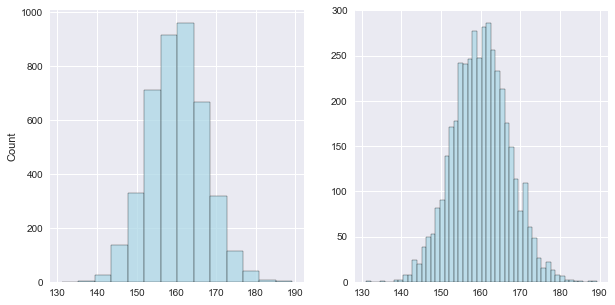

In [20]:
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1) # 1 row, 2 col, plot 1
# 'sturges': R's default method, only accounts for data size. Only
# optimal for gaussian data and underestimates number of bins
# for large non-gaussian datasets
sns.histplot(heights, bins="sturges", color="lightblue")
plt.subplot(1, 2, 2) # 1 row, 2 col, plot 2
# fd: (Freedman Diaconis Estimator), Robust (resilient to outliers)
# estimator that takes into account data variability and data size
sns.histplot(heights, bins="fd", color="lightblue")
plt.ylabel(None)
plt.show()

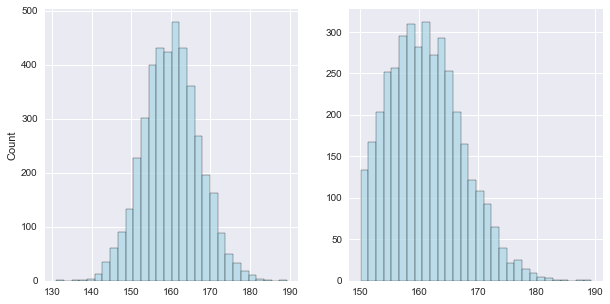

In [21]:
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1) # 1 row, 2 col, plot 1
sns.histplot(heights, bins=30, color="lightblue")
plt.subplot(1, 2, 2) # 1 row, 2 col, plot 2
sns.histplot(heights[heights>150], bins=30, color="lightblue")
plt.ylabel(None)
plt.show()


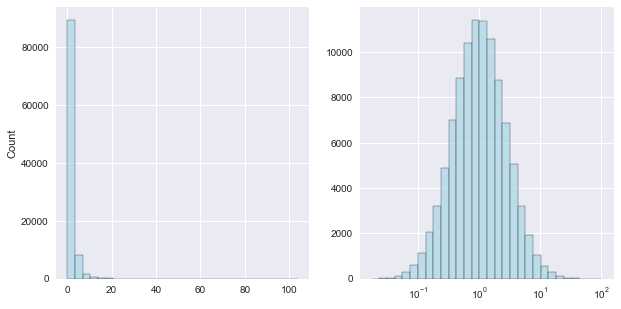

In [22]:
a1 = np.random.lognormal(mean=0.0, sigma=1.0, size=10**5)

plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1) # 1 row, 2 col, plot 1
sns.histplot(a1, bins=30, color="lightblue")
plt.subplot(1, 2, 2) # 1 row, 2 col, plot 2
sns.histplot(a1, bins=30, log_scale=True, color="lightblue")
plt.ylabel(None)
plt.show()

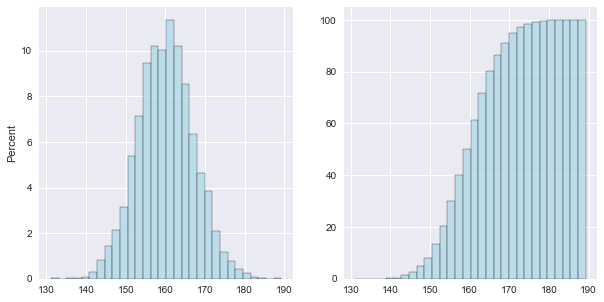

In [23]:
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1) # 1 row, 2 col, plot 1
sns.histplot(heights, stat="percent", bins=30, color="lightblue")
plt.subplot(1, 2, 2) # 1 row, 2 col, plot 2
sns.histplot(heights, stat="percent", cumulative=True, bins=30, color="lightblue")
plt.ylabel(None)
plt.show()

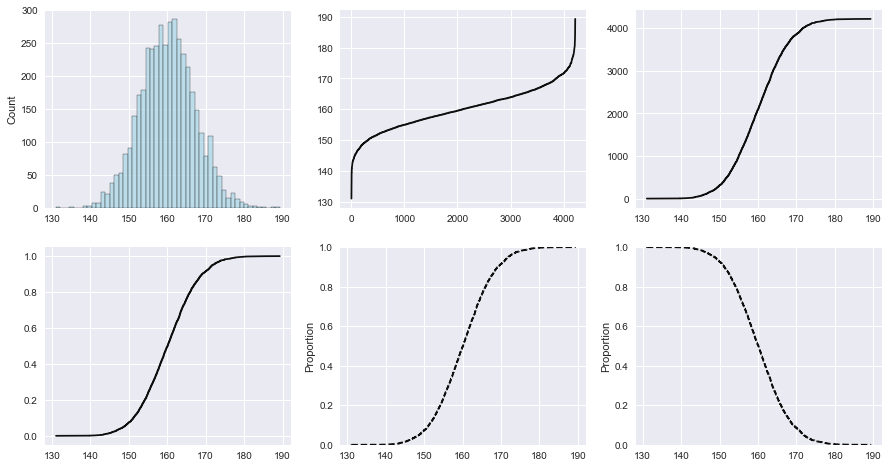

In [24]:
# Plot empirical cumulative distribution functions (ECDF)

n = len(heights)
heights_sorted = np.sort(heights)

plt.figure(figsize=[15, 8])

plt.subplot(2, 3, 1) # 2 row, 2 col, plot 1
sns.histplot(heights, color="lightblue")

plt.subplot(2, 3, 2) # 2 row, 2 col, plot 2
plt.plot(heights_sorted)

plt.subplot(2, 3, 3) # 2 row, 2 col, plot 3
plt.plot(heights_sorted, np.arange(1, n+1))

plt.subplot(2, 3, 4) # 2 row, 2 col, plot 4
plt.plot(heights_sorted, np.arange(1, n+1)/n)

plt.subplot(2, 3, 5) # 2 row, 2 col, plot 5
sns.ecdfplot(data=heights)

plt.subplot(2, 3, 6) # 2 row, 2 col, plot 6
sns.ecdfplot(data=heights, complementary=True) #  complementary: 1 - CDF

plt.show()